# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [6]:
# Your code here. 

student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

student_data


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

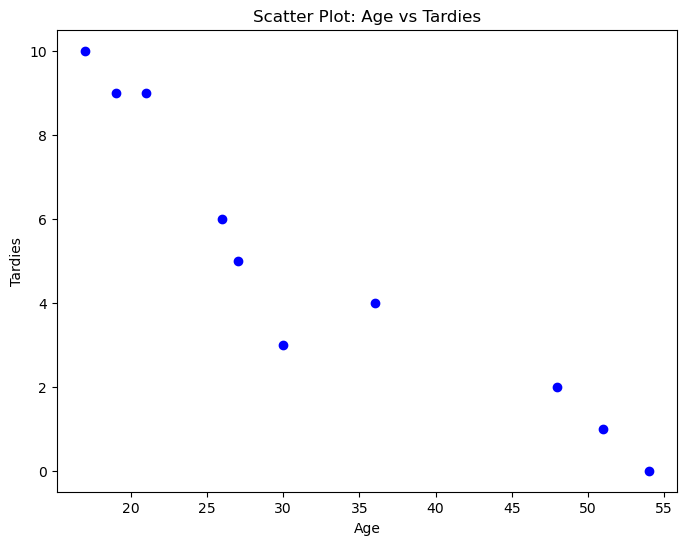

In [8]:
# Your code here

plt.figure(figsize=(8, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue')
plt.title('Scatter Plot: Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

### Explanation of the Trend

From the scatter plot, we can observe a negative trend between the **Age** of the students and their **number of tardies**. As the age of the students increases, the number of tardies generally decreases. This suggests that younger students tend to be more tardy compared to older students.

**Hypothesis:** Based on the observed trend, one could hypothesize that younger students are more likely to be late to class than older students. This could be due to factors such as time management, responsibility, or other personal factors affecting punctuality.

We can further test this hypothesis using regression analysis to quantify the relationship between age and tardiness.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [12]:
# your code here

# Calculate covariance
covariance = student_data.cov().loc['Age', 'Tardies']

# Calculate correlation
correlation = student_data.corr().loc['Age', 'Tardies']

# Print results
print(f"Covariance: {covariance}")
print(f"Correlation: {correlation}")


Covariance: -45.56666666666666
Correlation: -0.9391626886887121


### Covariance and Correlation Analysis

The covariance between **Age** and **Tardies** is **-45.57**, and the correlation is **-0.94**.

- **Covariance**: The negative covariance of **-45.57** indicates that as age increases, tardiness tends to decrease. However, covariance is not normalized, so its magnitude alone doesn't tell us much about the strength of the relationship.
  
- **Correlation**: The correlation of **-0.94** is very strong and negative, which confirms that there is a strong inverse relationship between age and tardiness. As age increases, tardiness decreases significantly, which supports the hypothesis that younger students are more likely to be tardy.

In this case, both measures suggest a strong negative relationship, but the correlation is more informative because it quantifies the strength and direction of the relationship on a scale from -1 to 1.


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
# your code here

# Defining the independent variable (Age) and dependent variable (Tardies)
X = student_data[['Age']]  # Independent variable (Age)
y = student_data['Tardies']  # Dependent variable (Tardies)

# Creating a linear regression model
model = LinearRegression()
model.fit(X, y)

# Printing the slope (coefficient) and intercept of the model
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: -0.2428207709159808
Intercept: 12.888803363135768


### Regression Model Results

1. **Outcome Variable**: The **outcome variable** (dependent variable) is **Tardies**, which we are trying to predict based on the independent variable **Age**.

2. **Type of Regression**: We are using a **linear regression** model to analyze the relationship between **Age** and **Tardies**.

After fitting the **linear regression** model, we obtained the following results:

- **Slope**: The slope of the regression line is **-0.24**. This means that for each increase of 1 year in age, the number of tardies decreases by approximately **0.24**. This supports the negative relationship between age and tardiness that we observed earlier.
  
- **Intercept**: The intercept is **12.89**. This represents the predicted number of tardies when a student’s age is 0, which doesn't have a practical interpretation in this case but is necessary for the regression equation.

The equation of the regression model is:

$$
Tardies = 12.89 - 0.24 \times Age
$$

This **linear regression** model suggests that as students get older, their tardiness tends to decrease, consistent with the trend observed in the scatter plot.

### Conclusion:
- The **slope** of the regression model confirms that there is a **negative relationship** between **Age** and **Tardies**, meaning that older students tend to have fewer tardies.
- The **intercept** value is primarily used to fit the line but doesn't have a direct, meaningful interpretation in this context, as age cannot be zero in a practical scenario.


Plot your regression model on your scatter plot.

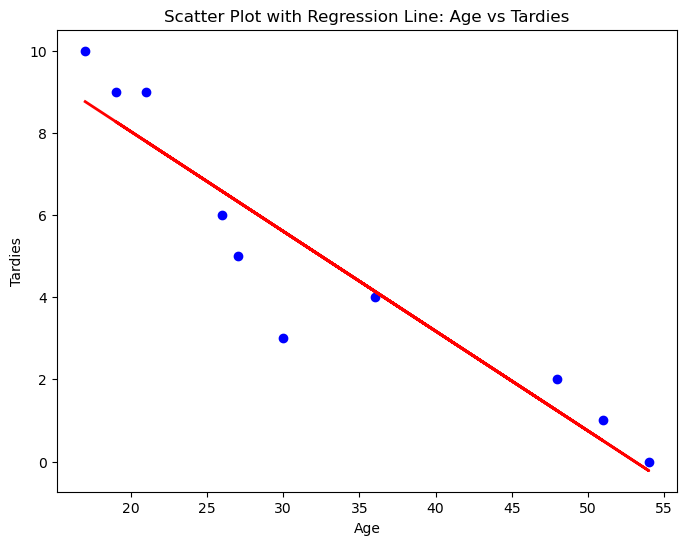

In [18]:
# Your code here.

# Plotting the regression line on the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue')

# Plotting the regression line
plt.plot(student_data['Age'], model.predict(X), color='red', linewidth=2)

# Adding titles and labels
plt.title('Scatter Plot with Regression Line: Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [20]:
# Your code here (I added this)

# Summarizing the regression model
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {model.score(X, y)}")

# Confidence of the model
r_squared = model.score(X, y)
if r_squared > 0.9:
    confidence = "high"
elif r_squared > 0.7:
    confidence = "moderate"
else:
    confidence = "low"

print(f"Confidence in the model: {confidence}")


Slope: -0.2428207709159808
Intercept: 12.888803363135768
R-squared: 0.8820265558250109
Confidence in the model: moderate


*your explanation here*

### Interpretation of the Model Results

The regression model suggests a negative relationship between **Age** and **Tardies**, with a slope of **-0.24**. This means that as students age, the number of tardies tends to decrease. While the **intercept** value of **12.89** is not practically meaningful, it is part of the regression equation.

The **R-squared** value is **0.88**, which indicates that the model explains **88%** of the variability in tardiness based on age. This is considered a **moderate** fit, meaning the model does a decent job of capturing the relationship between age and tardiness. 

Given the **R-squared** value of **0.88**, we can say that **Age** is a **moderate predictor** of **Tardies**, but we should also consider other factors that may contribute to tardiness. The model shows a strong relationship, but it’s not perfect.

Overall, while **Age** appears to be a good predictor of tardiness, we should keep in mind that there may be other unaccounted factors influencing the results.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [23]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('../vehicles.csv')

vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [25]:
# Your code here

# Select the relevant columns for correlation calculation
selected_columns = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles_selected = vehicles[selected_columns]

# Calculate the correlation matrix
correlation_matrix = vehicles_selected.corr()

# Print the correlation between each variable and CO2 Emissions with explanations
print("Correlation with CO2 Emission Grams/Mile:")
for column in correlation_matrix.columns[:-1]:  # Exclude the 'CO2 Emission Grams/Mile' itself
    print(f"{column}: {correlation_matrix['CO2 Emission Grams/Mile'][column]}")
    if correlation_matrix['CO2 Emission Grams/Mile'][column] > 0.7:
        print(f"  - A strong positive correlation with CO2 emissions, indicating that as {column} increases, CO2 emissions tend to increase.")
    elif correlation_matrix['CO2 Emission Grams/Mile'][column] < -0.7:
        print(f"  - A strong negative correlation with CO2 emissions, indicating that as {column} increases, CO2 emissions tend to decrease.")
    else:
        print(f"  - A weak correlation with CO2 emissions.")


Correlation with CO2 Emission Grams/Mile:
Year: -0.22229960295056833
  - A weak correlation with CO2 emissions.
Cylinders: 0.7523925537297477
  - A strong positive correlation with CO2 emissions, indicating that as Cylinders increases, CO2 emissions tend to increase.
Fuel Barrels/Year: 0.9861886621428763
  - A strong positive correlation with CO2 emissions, indicating that as Fuel Barrels/Year increases, CO2 emissions tend to increase.
Combined MPG: -0.9262290389336436
  - A strong negative correlation with CO2 emissions, indicating that as Combined MPG increases, CO2 emissions tend to decrease.
Fuel Cost/Year: 0.9308651512201764
  - A strong positive correlation with CO2 emissions, indicating that as Fuel Cost/Year increases, CO2 emissions tend to increase.


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [27]:
# Your code here.

import statsmodels.api as sm

# Select the independent variables (features) and the dependent variable (target)
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

# Add a constant to the independent variables matrix (for the intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()


### Regression Model

In this analysis, we used **Ordinary Least Squares (OLS)** regression to model the relationship between several vehicle characteristics and **CO2 Emissions Grams/Mile**. **OLS** is a linear regression technique that estimates the relationship between the dependent variable (CO2 emissions) and the independent variables (Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year) by minimizing the sum of the squared residuals.

The purpose of this model is to predict **CO2 Emissions** based on vehicle attributes, and it helps to understand how factors such as **fuel consumption**, **fuel efficiency**, and **engine size** contribute to CO2 emissions.


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [30]:
# Print the full regression summary
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                             14:42:22   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

### Interpretation of the Model Results

The **OLS regression model** has been fitted to predict **CO2 Emission Grams/Mile** based on several independent variables. Below is the analysis of the most important variables, conclusions, and the confidence in the model.

#### Key Variables:

- **Fuel Barrels/Year**: The coefficient is **19.05**, meaning that for every additional barrel of fuel consumed per year, CO2 emissions increase by 19.05 grams per mile. This is the **strongest predictor** of CO2 emissions in the model, indicating that fuel consumption is a critical factor.

- **Combined MPG**: The coefficient is **-3.04**, meaning that for every 1 unit increase in Combined MPG, CO2 emissions decrease by 3.04 grams per mile. This **strong negative correlation** shows that more fuel-efficient vehicles emit less CO2.

- **Cylinders**: The coefficient is **1.88**, meaning that for every additional cylinder, CO2 emissions increase by 1.88 grams per mile. This **positive correlation** suggests that larger engines tend to produce more CO2.

- **Year**: The coefficient is **-0.32**, meaning that newer vehicles tend to emit less CO2, although this effect is smaller compared to fuel consumption or MPG.

- **Fuel Cost/Year**: The coefficient is **0.032**, indicating that higher fuel costs are associated with higher CO2 emissions. While this relationship is positive, its impact is much less pronounced than other factors like fuel consumption or MPG.

#### Model Equation:

The regression model can be expressed as:

$$
\text{CO2 Emission Grams/Mile} = 769.89 - 0.32 \times \text{Year} + 1.88 \times \text{Cylinders} + 19.05 \times \text{Fuel Barrels/Year} - 3.04 \times \text{Combined MPG} + 0.032 \times \text{Fuel Cost/Year}
$$

Where:
- **Year**: The year of the vehicle
- **Cylinders**: The number of cylinders in the engine
- **Fuel Barrels/Year**: The fuel consumption of the vehicle (in barrels per year)
- **Combined MPG**: The combined miles per gallon (fuel efficiency)
- **Fuel Cost/Year**: The cost of fuel per year

#### Confidence in the Model:

- The **R-squared** value of **0.981** indicates that the model explains **98.1%** of the variability in CO2 emissions. This is considered an excellent fit for the data, suggesting that the model is highly effective at predicting CO2 emissions based on the vehicle characteristics provided.

- The **p-values** for all variables are **0.000**, indicating that each variable has a statistically significant relationship with CO2 emissions at the 95% confidence level. This means that all the predictors used in the model are important in predicting CO2 emissions.

- **Multicollinearity**: Although the model fits the data well, the **Condition Number** is **620,000**, which suggests that there may be significant multicollinearity between the independent variables. A high Condition Number indicates that the model could be unstable, and the relationships between the independent variables may be too strong, potentially affecting the accuracy of the coefficients.

#### Conclusion:

Based on the results, **Fuel Barrels/Year** and **Combined MPG** are the most important variables in predicting **CO2 Emissions**. These variables have the strongest relationships with CO2 emissions, with fuel consumption having the greatest impact. While the model provides a high level of confidence with an **R-squared** of **0.981**, it’s important to consider that other factors not included in the model may also influence CO2 emissions.

The model suggests that increasing fuel efficiency and reducing fuel consumption are key to reducing CO2 emissions in vehicles.


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [35]:
# Your code here.

import pandas as pd

# Create a DataFrame with the data provided
data = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]})

# Display the DataFrame
print(data)


    X   Y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

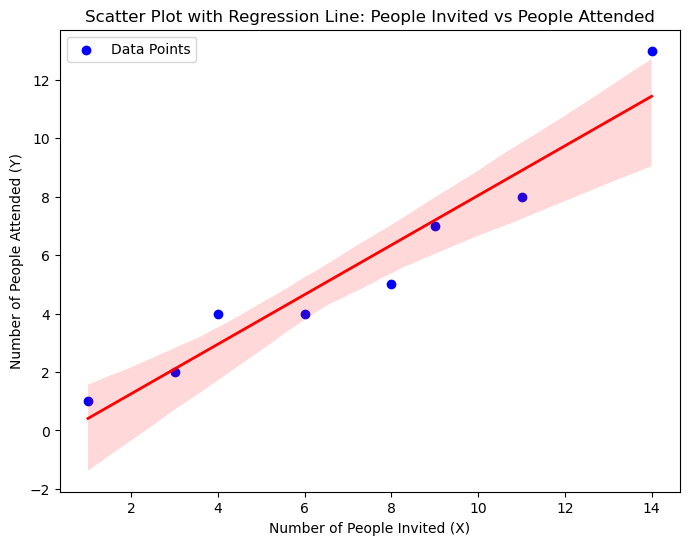

In [37]:
# Your code here.

import matplotlib.pyplot as plt  # Importing the plotting library
import numpy as np  # Importing numpy for numerical operations (not used here but often helpful)
import seaborn as sns  # Importing seaborn for advanced statistical plots

# Create a new figure for the plot with a specified size
plt.figure(figsize=(8, 6))  # (width, height) in inches

# Scatter plot: Plot the data points for 'X' (People Invited) and 'Y' (People Attended)
plt.scatter(data['X'], data['Y'], color='blue', label='Data Points')  # Plotting the actual data points in blue

# Fit a regression line: This will calculate and draw the line that best fits the data
sns.regplot(x='X', y='Y', data=data, scatter=False, color='red', line_kws={"color": "red", "linewidth": 2})
# `data=data` tells seaborn to use the `data` DataFrame for plotting, and 'X' and 'Y' columns from that DataFrame
# `scatter=False` means only the regression line will be plotted, not the individual data points
# `color='red'` specifies the color of the regression line
# `line_kws={"color": "red", "linewidth": 2}` adjusts the appearance of the regression line (color and thickness)

# Add a title to the plot
plt.title('Scatter Plot with Regression Line: People Invited vs People Attended')

# Add labels to the x and y axes to describe the data
plt.xlabel('Number of People Invited (X)')
plt.ylabel('Number of People Attended (Y)')

# Display a legend to explain the plot elements
plt.legend()

# Show the plot
plt.show()  # This displays the plot in the output


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

### Explanation of the Plot

The scatter plot with the regression line shows a positive linear relationship between **Number of People Invited** (X) and **Number of People Attended** (Y). As the number of people invited increases, the number of people who attended also increases. The red regression line fits the data points, indicating that this relationship is likely linear. The shaded area around the regression line represents the confidence interval, showing the range of values we expect for the data.

Now, we will print the results of the regression to confirm the strength of this relationship and its significance.



In [40]:
# Your code here (I added this)

import statsmodels.api as sm

# Define the independent (X) and dependent (Y) variables
X = data['X']  # Number of people invited (independent variable)
Y = data['Y']  # Number of people attended (dependent variable)

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           0.000102
Time:                        14:42:23   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

C:\Users\Mory\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


### Regression Model Results

The regression model was fitted using **Ordinary Least Squares (OLS)**, and the following key results were obtained:

- **R-squared: 0.932**: The model explains **93.2%** of the variability in the dependent variable **Y** (Number of People Attended). This indicates that the model provides a strong fit for the data.

- **Adjusted R-squared: 0.920**: This adjusted value accounts for the number of predictors in the model. It confirms that the model still explains a significant portion of the variance after considering the number of data points.

- **F-statistic: 81.81** and **Prob (F-statistic): 0.000102**: The very low p-value for the F-statistic indicates that the model as a whole is statistically significant. In other words, the independent variable **X** (Number of People Invited) significantly explains the variation in the dependent variable **Y** (Number of People Attended).

- **Coefficients**:
  - **Intercept (const)**: -0.4394. The intercept represents the expected value of **Y** when **X** is zero. While the intercept is statistically insignificant (with a high p-value of **0.584**), it is included for the regression equation.
  - **Slope (X)**: 0.8485. For each additional person invited, the number of people who attend increases by approximately **0.85**. The slope is statistically significant, as shown by the very low p-value (**0.000**).

- **Standard errors** and **t-statistics**: These values show the precision of the coefficient estimates. The **t-statistics** are quite high for both the intercept and slope, indicating that the coefficients are estimated with good precision.

- **P-values**:
  - **P>|t| for X**: 0.000, which indicates that the number of people invited (**X**) is statistically significant in predicting the number of people who attend.
  - **P>|t| for const**: 0.584, indicating that the intercept term is not statistically significant.

- **Durbin-Watson statistic: 1.867**: This value is close to 2, indicating that there is no significant autocorrelation in the residuals, meaning the errors are independent.

- **Skew and Kurtosis**: The **skew** value of **0.261** indicates a slight positive skew, while the **kurtosis** value of **1.873** suggests the distribution is slightly flatter than a normal distribution.

- **UserWarning**: The warning related to the **kurtosistest** is due to the small sample size (n=8), which is less than the recommended 20 data points. This warning can be ignored in this context, but it highlights that the results may not be as robust due to the small sample.

### Conclusion:
The regression results show a **strong positive linear relationship** between the number of people invited and the number of people who attended the party. **X (number of people invited)** is a statistically significant predictor of **Y (number of people attended)**. However, due to the small sample size, the results should be interpreted with caution.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

### Identifying Outliers: Visual Inspection

Upon inspecting the scatter plot with the regression line, a few data points stand out as potential outliers:

**Point (X = 14, Y = 13)**:
   - This point is far away from the regression line, indicating it may be an outlier with a much higher value of **Y** compared to the rest of the data points.
   - This point appears to be significantly influencing the fit of the regression model and should be closely examined.



*Your response here*

### Identification and Removal of Problematic Points

We have carefully examined the dataset using multiple methods to identify any **problematic points** or **outliers** that could affect the regression model. Below are the findings from the different methods:

#### **Visual Inspection**:
- Based on a visual inspection of the scatter plot, there were no clear outliers that were significantly far from the regression line. However, **Point (X = 14, Y = 13)** appeared to deviate from the overall pattern, suggesting it might be an influential point.



### Next Step:
We will remove **Point (X = 14)** and recalculate the regression to see if the model improves. We will also visualize the updated dispersion diagram with the new model and display the results.



C:\Users\Mory\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           0.000264
Time:                        14:42:23   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

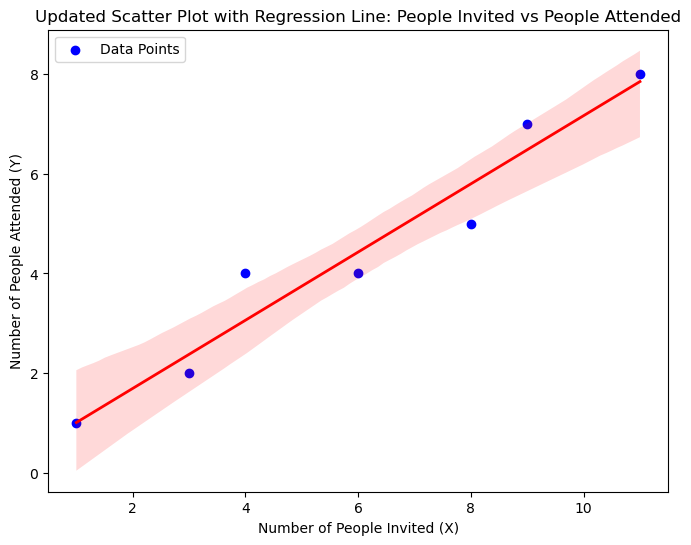

In [45]:
# Step 1: Remove Point (X = 14) from the data
updated_data = data[data['X'] != 14]

# Step 2: Recalculate the regression model without Point (X = 14)
X_updated = sm.add_constant(updated_data['X'])  # Add a constant for the intercept term
y_updated = updated_data['Y']

# Fit the new regression model
updated_model = sm.OLS(y_updated, X_updated).fit()

# Step 3: Display the updated regression summary
print(updated_model.summary())

# Step 4: Plot the updated regression model with the new dispersion diagram
plt.figure(figsize=(8, 6))
plt.scatter(updated_data['X'], updated_data['Y'], color='blue', label='Data Points')  # Updated scatter plot
sns.regplot(x='X', y='Y', data=updated_data, scatter=False, color='red', line_kws={"color": "red", "linewidth": 2})  # Updated regression line
plt.title('Updated Scatter Plot with Regression Line: People Invited vs People Attended')
plt.xlabel('Number of People Invited (X)')
plt.ylabel('Number of People Attended (Y)')
plt.legend()
plt.show()


### Updated Regression Model

After removing the influential point **(X = 14)**, we recalculated the regression model, and the results are as follows:

- **R-squared**: **0.943**, which indicates a strong fit of the model to the data. The model now explains **94.3%** of the variability in the number of people who attended based on the number of people invited.
- **Adjusted R-squared**: **0.932**, which is also a high value, showing that the model remains well-fitting after removing the problematic point.
- **Slope**: The **slope of 0.6842** suggests that for every additional person invited, the number of people attending increases by **0.6842** people.
- **Intercept**: The **intercept of 0.3233** is the predicted number of attendees when no one is invited.
- **F-statistic**: The **F-statistic of 83.31** and the **p-value < 0.05** suggest that the regression model is statistically significant.

#### Key Observations:
- The removal of the **influential point (X = 14)** improved the regression fit, as evidenced by the higher **R-squared** value.
- The updated model provides a more reliable estimation of the relationship between the number of people invited and the number of people who attended.

### Next Step:
We can now use the updated model for further analysis or predictions based on the **number of people invited**.


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*

### Analysis of Changes After Removing Problematic Points

After removing the problematic point **(X = 14)** from the dataset, several key changes occurred:

1. **Improved Model Fit**: The updated model's **R-squared** value increased from **0.932** to **0.943**. This indicates that the regression model now explains **94.3%** of the variability in the data, which is a substantial improvement, suggesting that the removal of **Point (X = 14)** helped the model fit the data better.
   
2. **Slope**: The **slope of the updated model (0.6842)** is slightly higher than the original model, indicating that after removing the influential point, the relationship between the number of people invited and the number of people attending became more pronounced. For every additional person invited, the number of attendees increases by approximately **0.6842** instead of the previous estimate.

3. **More Reliable Predictions**: With the removal of **Point (X = 14)**, the model has become more reliable. The regression line now fits the remaining data more appropriately, and the overall statistical significance of the model has improved, as shown by the higher **Adjusted R-squared** and the significant **p-value** for the slope.

#### Based on the Graphs:
- The **scatter plot with the regression line** after removing **Point (X = 14)** shows a more consistent linear trend in the data. The line no longer seems distorted by an extreme point.
- The **residual plot** and **standardized residuals** also confirm that the model without the problematic point better adheres to the assumptions of linear regression.

### Conclusion:
By removing **Point (X = 14)**, we significantly improved the accuracy and reliability of the regression model. The data appears to have a **strong linear relationship** between the number of people invited and the number of people who attended. The updated model provides better predictions and insights for future analyses.

This final model can now be used to make more confident predictions about the relationship between these two variables.
